### **Projeto Final** - Resilia + iFood

##### *Grupo 3*: 

*   Gabriel Borges
*   Gabriela Turquetti
*   Ludmila Leal

# **Ah, você é de Brasília?**

Neste *notebook* apresentamos a **análise exploratória** realizada para o Projeto Final do Vamo AI. O objetivo desse projeto é, com dados pessoais de localização e música, confirmar ou não, os esteriótipos que as pessoas possuem sobre os brasilienses e Brasília.

Para mais informações sobre as **bases de dados** usadas ou **visualização dos dados** via *Tableau*, acesse nosso [repositório](https://github.com/turquetti/projeto5-vamoai) no GitHub. 

---

Nossa **análise exploratória** está estruturada da seguinte forma:


1.   **Tratamento das bases de dados**
  1. Google Maps
  2. Youtube
  3. Spotify
  4. Regiões Administrativas do Distrito Federal

2.   **Exploração de dados**
  1. "Em Brasília todo mundo é rico e mora no Plano Piloto"
  2. "Você vê o presidente todos os dias?"
  3. "O que se faz em Brasília?
  4. "Em Brasília todo mundo só ouve Legião Urbana"
  5. Brasília é um ovo!
3.   **Referências**


# Bibliotecas

In [1]:
import pandas as pd
from pathlib import Path
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. **Tratamento das bases de dados**

### 1.1. *Google Maps*

Quando recebemos a base de dados do Google, recebemos duas formas de arquivos, ambas em .json: 
*   *Histórico de Localização* - Arquivo que consta todas as localizações do período solicitado, fornecendo somente informações de latitude, longitude e data. 

*  Pasta *Semantic Location History* - Dentro dela encontramos todos os arquivos separados por mês e por ano. Esses arquivos .json há mais informações além da latitude, longitude e data, como nome do local visitado e endereço da localização, informações essenciais para nossa análise! 



---

Para ilustrar como o tratamento dos dados do Google Maps nos períodos de 2017 e 2019 foi feito, iremos importar um arquivo .json de Setembro de 2017. 

In [29]:
# importando o arquivo a ser tratado
p = Path(r'/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/gabriela/historico_de_localizacao/semantic_location_history/2017/2017_SEPTEMBER.json')

In [30]:
with p.open('r', encoding='utf-8') as f:
    h = json.loads(f.read())

In [31]:
# usaremos a função json_normalize para acessar somente o campo 'placeVisit' 
# que contém as informações que iremos usar (latitude, longitude, nome e 
# timestamp). 

df_sept_17 = pd.json_normalize(h, 'timelineObjects', ['placeVisit', ['location', 'latitudeE7']], errors='ignore')

In [32]:
df_sept_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   placeVisit.location.latitudeE7                        97 non-null     float64
 1   placeVisit.location.longitudeE7                       97 non-null     float64
 2   placeVisit.location.placeId                           97 non-null     object 
 3   placeVisit.location.address                           97 non-null     object 
 4   placeVisit.location.name                              97 non-null     object 
 5   placeVisit.location.sourceInfo.deviceTag              97 non-null     float64
 6   placeVisit.location.locationConfidence                97 non-null     float64
 7   placeVisit.duration.startTimestampMs                  97 non-null     object 
 8   placeVisit.duration.endTimestampMs                    97 non

In [33]:
df_sept_17.columns

Index(['placeVisit.location.latitudeE7', 'placeVisit.location.longitudeE7',
       'placeVisit.location.placeId', 'placeVisit.location.address',
       'placeVisit.location.name', 'placeVisit.location.sourceInfo.deviceTag',
       'placeVisit.location.locationConfidence',
       'placeVisit.duration.startTimestampMs',
       'placeVisit.duration.endTimestampMs', 'placeVisit.placeConfidence',
       'placeVisit.centerLatE7', 'placeVisit.centerLngE7',
       'placeVisit.visitConfidence', 'placeVisit.otherCandidateLocations',
       'placeVisit.editConfirmationStatus',
       'activitySegment.startLocation.latitudeE7',
       'activitySegment.startLocation.longitudeE7',
       'activitySegment.endLocation.latitudeE7',
       'activitySegment.endLocation.longitudeE7',
       'activitySegment.duration.startTimestampMs',
       'activitySegment.duration.endTimestampMs', 'activitySegment.distance',
       'activitySegment.activityType', 'activitySegment.confidence',
       'activitySegment.ac

In [34]:
# incluindo na variável abaixo todas os campos que não iremos utilizar. 

columns = ['placeVisit.location.placeId', 'placeVisit.location.address',
       'placeVisit.location.sourceInfo.deviceTag',
       'placeVisit.location.locationConfidence',
       'placeVisit.placeConfidence',
       'placeVisit.centerLatE7', 'placeVisit.centerLngE7',
       'placeVisit.visitConfidence', 'placeVisit.otherCandidateLocations',
       'placeVisit.editConfirmationStatus',
       'activitySegment.startLocation.latitudeE7',
       'activitySegment.startLocation.longitudeE7',
       'activitySegment.endLocation.latitudeE7',
       'activitySegment.endLocation.longitudeE7',
       'activitySegment.duration.startTimestampMs',
       'activitySegment.duration.endTimestampMs', 'activitySegment.distance',
       'activitySegment.activityType', 'activitySegment.confidence',
       'activitySegment.activities', 'activitySegment.waypointPath.waypoints',
       'activitySegment.editConfirmationStatus',
       'activitySegment.parkingEvent.timestampMs',
       'activitySegment.parkingEvent.location.latitudeE7',
       'activitySegment.parkingEvent.location.longitudeE7',
       'activitySegment.simplifiedRawPath.points',
       'placeVisit.simplifiedRawPath.points',
       'activitySegment.parkingEvent.location.accuracyMetres',
       'placeVisit.childVisits', 'placeVisit', 'location.latitudeE7']

In [35]:
# filtrando as colunas que não iremos utilizar e excluindo informações NaN.
df_sept_17.drop(columns=columns, inplace=True)
df_sept_17.dropna(inplace=True)

In [36]:
# renomeando colunas
df_sept_17.columns = ['latitude', 'longitude','name','start_timestamp', 'end_timestamp']

In [37]:
# transformando e convertendo as datas para datetime

df_sept_17['start_timestamp'] = pd.to_datetime(df_sept_17['start_timestamp'], unit="ms")
df_sept_17['end_timestamp'] = pd.to_datetime(df_sept_17['end_timestamp'], unit="ms")

In [27]:
df_sept_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         97 non-null     float64       
 1   longitude        97 non-null     float64       
 2   name             97 non-null     object        
 3   start_timestamp  97 non-null     datetime64[ns]
 4   end_timestamp    97 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 3.9+ KB


In [38]:
df_sept_17.reset_index(inplace=True)
df_sept_17.drop(columns='index', inplace=True)

In [39]:
df_sept_17['latitude'] = df_sept_17['latitude']/10000000
df_sept_17['longitude'] = df_sept_17['longitude']/10000000

##### Esse processo de tratamento dos dados foi feito para todos os arquivos de 2017, 2018 e 2019, e como os arquivos são disponibilizados mensalmente, de forma a facilitar a exploração de dados, foi necessário concatená-los por ano, e posteriormente concatená-los em somente um arquivo, conforme é mostrado logo abaixo! 

---

#### Concatenando os arquivos limpos

In [ ]:
df = [df_2017, df_2018 df_2019]

In [ ]:
df = pd.concat(df)

In [ ]:
#exportando o dataframe com todas as localizações entre 2017 e 2019 para .csv

df.to_csv('/content/drive/MyDrive/Projeto_5/aed/full-loc-gabriela.csv')

### 1.2. *YouTube*

Quando recebemos a base de dados do Google, recebemos duas formas de arquivos, ambas em .json: 
*   *Histórico de Pesquisa* - Arquivo que consta todas as pesquisas realizadas no YouTube.

*  *Histórico de Visualização* - Arquivo que consta todas as visualizações realizadas pelo usuário. Para nossa análise, iremos utilizar esse arquivo!


---


In [106]:
df_yt = pd.read_json('/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/ludmila/youtube/historico-de-visualizacao.json')

In [107]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   header     5301 non-null   object
 1   title      5301 non-null   object
 2   titleUrl   5280 non-null   object
 3   subtitles  5058 non-null   object
 4   time       5301 non-null   object
 5   products   5301 non-null   object
 6   details    91 non-null     object
dtypes: object(7)
memory usage: 290.0+ KB


In [108]:
# filtrando valores NaN

df_yt.drop(columns='details', inplace=True)
df_yt.dropna(inplace=True)
df_yt.reset_index(inplace=True)

In [109]:
# filtrando as colunas que não iremos utilizar

df_yt.drop(columns=['index', 'header','products'], inplace=True)

In [110]:
# extraindo o nome do canal do Youtube da coluna 'subtitles'

c = len(df_yt)
channel_name = []

for i in range(c):
    channel_name.append(df_yt['subtitles'][i][0]['name'])

# criando uma nova coluna com o nome dos canais de cada vídeo assistido
df_yt['channelName'] = channel_name

In [111]:
# Retirando 'Watched' no título de todos os vídeos assistidos

df_yt['title'] = df_yt['title'].str.replace('Watched','')

In [112]:
# transformando o formato do timestamp

date_time = []

for i in range(c):
    date_split = df_yt['time'][i].split('T')
    date_time.append(date_split[0])


df_yt['time'] = date_time

df_yt['time'] = pd.to_datetime(df_yt['time'])

In [113]:
# filtrando o df para vídeos assistidos somente entre 2020 e 2021

start_date = '2020-01-01'
end_date = '2021-07-20'

df_yt = df_yt.loc[(df_yt['time'] >= start_date)
                     & (df_yt['time'] < end_date)]

In [114]:
df_yt.reset_index(inplace=True)
df_yt.drop(columns=['index','subtitles'], inplace=True)

In [115]:
# extraindo a ID de todos os vídeos assistidos da coluna 'titleUrl'

c = len(df_yt)
id = []

for i in range(c):
    url = df_yt['titleUrl'][i].split('=')
    id.append(url[1])

Para filtrar somente aqueles vídeos que são de música, iremos consumir a API do YouTube para extrair a categoria de todos os vídeos e posteriormente filtrar pela categoria '10', referente à categoria de Música.

In [91]:
!pip install --upgrade google-api-python-client

     |████████████████████████████████| 7.2 MB 4.8 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.272 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.15.0 which is incompatible.


In [116]:
from googleapiclient.discovery import build

In [117]:
api_key='insira_sua_key_aqui'

In [118]:
youtube = build('youtube','v3', developerKey=api_key)

In [119]:
# Extraindo a categoria das requisições

categoryId = []

for j in id:
    try:
        res = youtube.videos().list(part='snippet', id = j).execute()
        categoryId.append(res['items'][0]['snippet']['categoryId'])
    except:
        categoryId.append('')

df_yt['category'] = categoryId

In [120]:
df_yt = df.loc[df_yt['category'] == '10']

In [ ]:
df_yt.to_csv('historico-yt.csv')

### 1.3. *Spotify*

A base de dados do Spotify compreende o arquivo *StreamingHistory0.json* com todo o histórico de *streaming* ouvido entre 2020 e 2021.


In [122]:
df_sptfy = pd.read_json('/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/gabriela/spotify/StreamingHistory0.json')

In [123]:
df_sptfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     3838 non-null   object
 1   artistName  3838 non-null   object
 2   trackName   3838 non-null   object
 3   msPlayed    3838 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 120.1+ KB


In [124]:
df_sptfy['endTime'] = pd.to_datetime(df_sptfy['endTime'])

In [125]:
df_sptfy['minutedPlayed'] = df_sptfy['msPlayed']/60000

In [130]:
df_sptfy.drop(columns='msPlayed', inplace=True)

### 1.4. Regiões Administrativas do Distrito Federal

Para enriquecer nossa análise com mais informações sobre as Regiões Administrativas (RA) do Distrito Federal, na plataforma InfoDF foi possível obter dois arquivos:

*   *Delimitação Amb* - arquivo .geojson que possui os limites geográficos de cada RA.

*   *Dados Brasília Metropolitana* - tabela com informações de renda per capita de cada região, porcentagem de mulheres e homens, porcentagem de acesso à saneamento básico, dentre outros.


#### *Delimitação Amb*

In [133]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.8 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 34.0 MB/s 


In [134]:
import geopandas as gpd

In [137]:
mapa_df = gpd.read_file('/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/dados_complementares/mapa_df/delimitacao_amb.geojson')

In [139]:
#filtrando as cidades do Estado do Goías

mapa_df = mapa_df.loc[mapa_df['sigla_uf'] != 'GO']

In [141]:
mapa_df.drop(columns=['geocod_mu','sigla_uf'], inplace=True)

In [142]:
mapa_df.to_file("delimitacao_df.geojson", driver='GeoJSON')

,ra_num,nome,ra_prefixo,geometry
0,1,Plano Piloto,I,"MULTIPOLYGON (((-47.85950 -15.68823, -47.85951..."
1,2,Gama,II,"MULTIPOLYGON (((-48.03822 -15.94543, -48.03714..."
2,4,Brazlândia,IV,"MULTIPOLYGON (((-48.20825 -15.74034, -48.20778..."
3,5,Sobradinho,V,"MULTIPOLYGON (((-47.76379 -15.52734, -47.76379..."
4,6,Planaltina,VI,"MULTIPOLYGON (((-47.41841 -15.50182, -47.41841..."
5,7,Paranoá,VII,"MULTIPOLYGON (((-47.66188 -15.73406, -47.66217..."
6,10,Guará,X,"MULTIPOLYGON (((-47.97051 -15.80634, -47.97056..."
7,12,Samambaia,XII,"MULTIPOLYGON (((-48.04743 -15.85948, -48.04742..."
8,13,Santa Maria,XIII,"MULTIPOLYGON (((-47.89151 -15.97127, -47.89139..."
9,14,São Sebastião,XIV,"MULTIPOLYGON (((-47.79090 -15.87513, -47.79014..."


#### *Dados Brasília Metropolitana*

In [407]:
df_RA = pd.read_csv('/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/dados_complementares/mapa_df/dados_brasilia_metropolitana.csv', error_bad_lines=False, delimiter=';')

In [408]:
df_RA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unidade Territorial             46 non-null     object 
 1   Habitantes                      46 non-null     object 
 2   Homens (%)                      46 non-null     object 
 3   Mulheres (%)                    46 non-null     object 
 4   Renda per Capita R$             46 non-null     object 
 5   Renda Domiciliar per Capita R$  46 non-null     object 
 6   Conectados à Internet (%)       46 non-null     object 
 7   Automóveis por habitante        46 non-null     object 
 8   Domicílios                      46 non-null     float64
 9   Habitantes por Domicílio        46 non-null     object 
 10  Esgoto (%)                      46 non-null     object 
 11  Água (%)                        46 non-null     object 
 12  Energia Elétrica (%)            46 non

In [411]:
df_RA.columns

Index(['Unidade Territorial', 'Habitantes', 'Homens (%)', 'Mulheres (%)',
       'Renda per Capita R$', 'Renda Domiciliar per Capita R$',
       'Conectados à Internet (%)', 'Automóveis por habitante', 'Domicílios',
       'Habitantes por Domicílio', 'Esgoto (%)', 'Água (%)',
       'Energia Elétrica (%)'],
      dtype='object')

In [412]:
colunas = ['Homens (%)', 'Mulheres (%)', 'Conectados à Internet (%)', 
           'Automóveis por habitante', 'Domicílios', 'Habitantes por Domicílio', 
           'Esgoto (%)', 'Água (%)', 'Energia Elétrica (%)']

In [413]:
df_RA.drop(columns=colunas, inplace=True)

In [414]:
#filtrando as cidades do Estado do Goiás

RA_filter = ['Valparaíso de Goiás', 'Santo Antônio do Descoberto', 
             'Planaltina de Goiás', 'Águas Lindas de Goiás', 'Alexânia',
             'Cidade Ocidental', 'Cocalzinho de Goíás','Cristalina',
             'Formosa', 'Luziânia', 'Novo Gama', 'Padre Bernardo', 'Distrito Federal']

In [415]:
df_RA = df_RA[~df_RA['Unidade Territorial'].isin(RA_filter)]

In [ ]:
df_RA['Habitantes'] = df_RA['Habitantes'].astype(float)*1000
df_RA['Renda per Capita R$'] = df_RA['Renda per Capita R$'].str.replace('.','')
df_RA['Renda Domiciliar per Capita R$'] = df_RA['Renda Domiciliar per Capita R$'].str.replace('.','')
df_RA['Renda per Capita R$'] = df_RA['Renda per Capita R$'].str.replace(',','.').astype(float)
df_RA['Renda Domiciliar per Capita R$'] = df_RA['Renda Domiciliar per Capita R$'].str.replace(',','.').astype(float)
df_RA['Habitantes'] = df_RA['Habitantes'].astype(int)

In [402]:
df_RA.to_csv('/content/drive/MyDrive/Projeto_5/aed/bases_de_dados/dados_complementares/mapa_df/dados_brasilia.csv')

# 2. **Exploração e visualização dos dados**

### 2.1. *Em Brasília todo mundo é rico e mora no Plano Piloto*

Esse é um esteriótipo bem comum! Mas será que em Brasília só existe o *Plano Piloto*?

In [418]:
df_RA

,Unidade Territorial,Habitantes,Renda per Capita R$,Renda Domiciliar per Capita R$
0,Águas Claras,117346,4658.36,5133.65
1,Arniqueira,39236,1764.19,2012.43
2,Brazlândia,53534,1026.97,1129.13
3,Candangolândia,16489,1405.73,1434.56
4,Ceilândia,349955,1107.64,1224.75
5,Cruzeiro,31079,3127.81,3749.44
7,Fercal,8687,739.29,816.50
8,Gama,132404,1348.12,1607.29
9,Guará,133748,3215.32,3688.76
10,Itapoã,62234,814.64,929.57


Na verdade não, Brasília é dividida em 33 regiões administrativas.

In [419]:
len(df_RA)

33

Já que Brasília não é somente o Plano Piloto, quantas pessoas moram em Brasília?

In [420]:
df_RA.loc[df_RA['Unidade Territorial'] == 'Plano Piloto']

,Unidade Territorial,Habitantes,Renda per Capita R$,Renda Domiciliar per Capita R$
18,Plano Piloto,217073,5916.22,6776.86


Dessa forma, percebemos que a população do Plano Piloto equivale a cerca de 7% de Brasília. Logo percebemos que somente uma pequena parcela de Brasília mora no Plano Piloto!

Então, quais são as regiões mais populosas e quais são as regiões mais ricas?

In [421]:
df_RA.sort_values('Habitantes', ascending=False).head()

,Unidade Territorial,Habitantes,Renda per Capita R$,Renda Domiciliar per Capita R$
4,Ceilândia,349955,1107.64,1224.75
22,Samambaia,231942,857.78,996.92
18,Plano Piloto,217073,5916.22,6776.86
31,Taguatinga,210142,1895.06,2258.25
17,Planaltina,177540,977.47,1139.40


In [430]:
df_RA.sort_values('Renda per Capita R$', ascending=False).head()

,Unidade Territorial,Habitantes,Renda per Capita R$,Renda Domiciliar per Capita R$
13,Lago Sul,29662,7663.09,8355.04
30,Sudoeste/Octogonal,54559,6655.28,7137.38
18,Plano Piloto,217073,5916.22,6776.86
16,Park Way,19022,5768.63,6138.45
12,Lago Norte,36474,5329.57,6112.26


Dessa forma, podemos observar que, as regiões com maiores populações (exceto o Plano Piloto) são regiões que possuem uma Renda per Capita mais baixa e vice-versa. Será que essa é uma tendência que se estende à todas as 33 RAs?


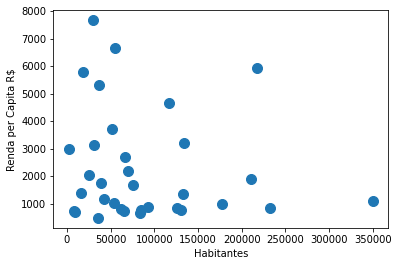

In [428]:
df_RA.plot.scatter(x = 'Habitantes', y = 'Renda per Capita R$', s = 100)

Observando o gráfico de dispersão acima, observamos que não há uma correlação entre o Número de Habitantes vs. sua Renda per Capita, apesar de possuirmos RAs com grandes populações e uma Renda per Capita baixa, de forma geral, podemos observar que temos o outro caso, de RAs com populações pequenas e uma renda per capita baixa também.

Contudo, percebemos que normalmente, RAs de alto poder aquisitivo (exceto o Plano Piloto), normalmente possuem populações relativamente menores. 

### 2.2. *Você vê o presidente todos os dias?*

Esse deve ser o esteriótipo que mais ouvimos, será mesmo que vemos o presidente todos os dias?

Utilizando a biblioteca *geopy*, vamos calcular as distâncias aproximadas das casas do presidente e governador para nossas casas!

In [265]:
from geopy.distance import geodesic

In [275]:
origem_gabi = (-15.8471010, -48.0319000)
destino_presidente = (-15.7928000, -47.8221000)
destino_governador = (-15.8493000, -47.8973000)

print(f"Distância para a casa do presidente: {round(geodesic(origem_gabi, destino_presidente).km, 2)} km")
print(f"Distância para a casa do governador: {round(geodesic(origem_gabi, destino_governador).km, 2)} km")

Distância para a casa do presidente: 23.27 km
Distância para a casa do governador: 14.42 km


In [278]:
origem_lud = (-15.7816365, -48.0012873)
destino_presidente = (-15.7928000, -47.8221000)
destino_governador = (-15.8493000, -47.8973000)

print(f"Distância para a casa do presidente: {round(geodesic(origem_lud, destino_presidente).km, 2)} km")
print(f"Distância para a casa do governador: {round(geodesic(origem_lud, destino_governador).km, 2)} km")

Distância para a casa do presidente: 19.24 km
Distância para a casa do governador: 13.42 km


### 2.3. *O que se faz em Brasília?*

Importando arquivos tratados com as localizações referentes ao período de 2017 a 2019.

In [220]:
localizacao_gabi = pd.read_csv('/content/drive/MyDrive/Projeto_5/loc-gabi.csv')
localizacao_lud = pd.read_csv('/content/drive/MyDrive/Projeto_5/loc-lud/loc-lud.csv')

Os locais mais frequentes da Gabi são: sua casa, a sua universidade, trabalho e mercado! 

In [ ]:
localizacao_gabi['nome'].value_counts().head(6)

Os locais mais frequentes da Lud são: sua casa, uma pizzaria, mercado e uma loja! 

In [ ]:
localizacao_lud['nome'].value_counts().head(6)

### 2.4. *Em Brasília todo mundo só ouve Legião Urbana*

Para resolver o mistério se os brasilienses somente ouvem Legião Urbana, iremos explorar a base de dados do Spotify da Gabi e base do Youtube da Lud. 

##### 2.1 *Spotify da Gabi*

Analisando os seis artistas mais ouvidos da Gabi, observamos  3 artistas brasileiros mais ouvidos (Caetano Veloso, Los Hermanos e Novos Baianos) e 3 artistas internacionais (Carla Bruni, Blur e Radiohead). 

Apesar de possuir 3 artistas brasileiros na lista, nenhum deles é brasiliense. 

In [298]:
artist = (
    df_sptfy
    .groupby(['artistName'])
    .agg({'minutedPlayed':'sum'})
    .sort_values('minutedPlayed', ascending=False)
    .head(6)
)

artist

,minutedPlayed
artistName,
Caetano Veloso,332.700250
Carla Bruni,259.005883
Los Hermanos,191.950067
Blur,188.723700
Novos Baianos,176.880367
Radiohead,131.639450


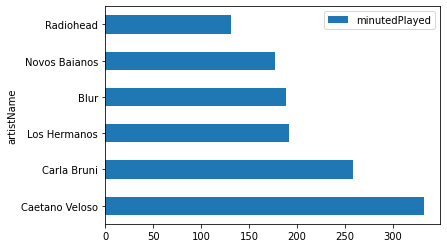

In [299]:
artist.plot.barh()

Analisando as 5 músicas mais ouvidas, observamos que as músicas mais frequentes são internacionais!

In [300]:
track = df_sptfy['trackName'].value_counts().head()
track

Feel Good Inc.       18
Loser                17
Dance Monkey         17
Seven Nation Army    16
Blossom              16
Name: trackName, dtype: int64

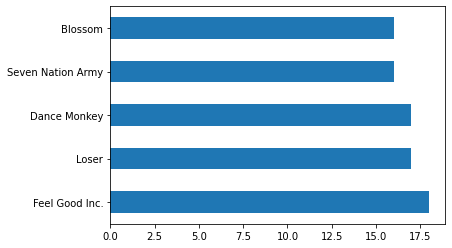

In [301]:
track.plot.barh()

##### 2.2 *YouTube da Lud*

Analisando os seis artistas mais ouvidos da Lud, observamos  que todos eles são brasileiros, porém, nenhum deles é brasiliense. 

In [283]:
canais = df_yt['channelName'].value_counts().head()
canais

Bia Marques          370
Elana Dara           218
Thayná Bitencourt    136
Bruno Braz            95
L7NNON                85
Name: channelName, dtype: int64

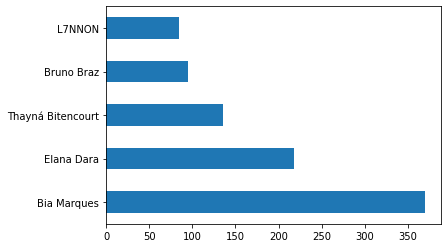

In [284]:
canais.plot.barh()

Quanto as músicas mais tocadas, percebemos que as artistas mais recorrentes são Bia Marques e Elana Dara, ambas artistas cover, que ocupam exatamente primeiro e segundo lugar das artistas mais ouvidas da Lud. 

In [285]:
musicas = df_yt['title'].value_counts().head()
musicas

 Poesia Acústica 8 - Bia Marques (cover)                    32
 “Poesia Acústica #6 | Era uma Vez” - (Cover) Elana Dara    29
 Elana Dara - aff...                                        23
 Malibu || Não Vou Mais - Gaab & Elana Dara                 21
 "Capricorniana" Poesia Acústica #3 - (Cover) Elana Dara    20
Name: title, dtype: int64

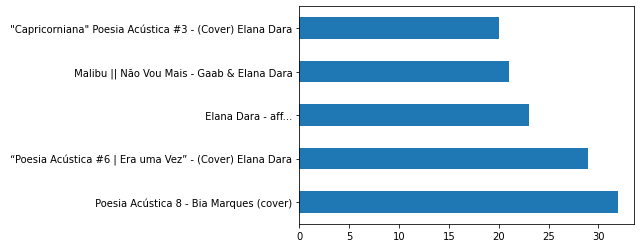

In [286]:
musicas.plot.barh()

### 2.5. *Brasília é um ovo!*

Em Brasília temos o famoso ditado: "*Em Brasília existem três pessoas: eu, você e a pessoa que a gente conhece*". 

E apesar de não ter encontrado o elo perdido entre nós duas, porque não descobrir se em algum momento nós chegamos a frequentar algum lugar em comum?

In [215]:
loc_gabi = pd.read_csv('/content/drive/MyDrive/Projeto_5/loc-gabi.csv')
loc_lud = pd.read_csv('/content/drive/MyDrive/Projeto_5/loc-lud/loc-lud.csv')

In [216]:
loc_gabi = loc_gabi['nome'].tolist()
loc_lud = loc_lud['nome'].tolist()

In [217]:
#filtrando os locais em comum
equals = []

for i in range(len(loc_gabi)):
    if loc_gabi[i] not in loc_lud:
        pass
    else :
        equals.append(loc_gabi[i])


In [218]:
# filtrando valores duplicados

equals = list(set(equals))

Encontramos 11 lugares em comum entre 2017 e 2019. Esses locais são majoritariamente em regiões próximas às RAs que residimos, e elas variam entre supermercados, restaurantes, shoppings, universidades, rodovidárias e até um hospital!

In [219]:
df = pd.DataFrame(equals)
df.rename(columns={0:'nome'})

,nome
0,Rossoni Pastelaria e carne de sol
1,GRU Airport
2,BIG BOX Supermercados 408 NORTE: Delivery em A...
3,Taguatinga Shopping
4,Rodoviária Plano Piloto - A2
5,Hospital de Base do Distrito Federal
6,Rodoviária Plano Piloto B
7,Base Atacado - ADE
8,Terraço Shopping
9,University of Brasília


# **Referências**

*   `pib_estados.csv` - [IBGE](https://sidra.ibge.gov.br/tabela/5938) (Informações extraídas referentes ao ano de 2018)
*   `delimitacao_amb.geojson` - [Codeplan - InfoDF](http://infodf.codeplan.df.gov.br/)
*   `dados_brasilia_metropolitana` - [Codeplan - InfoDF](http://infodf.codeplan.df.gov.br/)
